In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [8]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Here we can see that Market Category , Number of doors and Engine Fuel type these parameters do not have much variation to be noted so we can drop these columns.

In [9]:
df = df.drop(['Engine Fuel Type','Number of Doors','Market Category'], axis = 1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [10]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [11]:
df.shape

(11914, 13)

In [12]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (792, 13)


In [13]:
df=df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [14]:
df.shape

(11122, 13)

In [15]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [16]:
df = df.dropna()
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [17]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


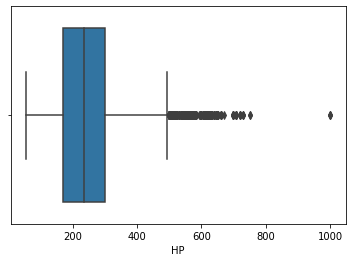

In [18]:
sns.boxplot(x=df['HP'])

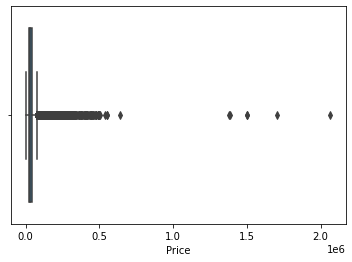

In [19]:
sns.boxplot(x=df['Price'])

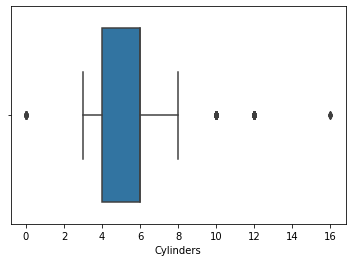

In [20]:
sns.boxplot(x=df['Cylinders'])

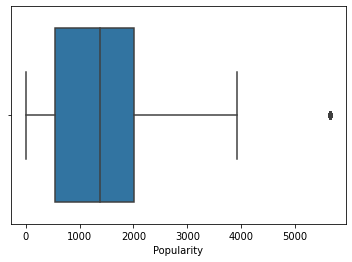

In [21]:
sns.boxplot(x=df['Popularity'])

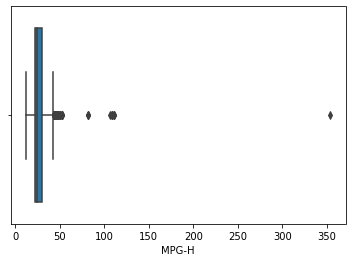

In [22]:
sns.boxplot(x=df['MPG-H'])


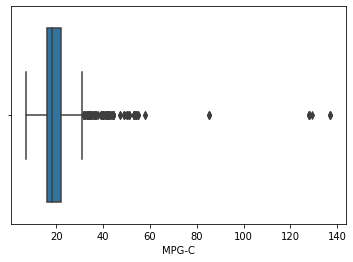

In [23]:
sns.boxplot(x=df['MPG-C'])


In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [25]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8546, 13)

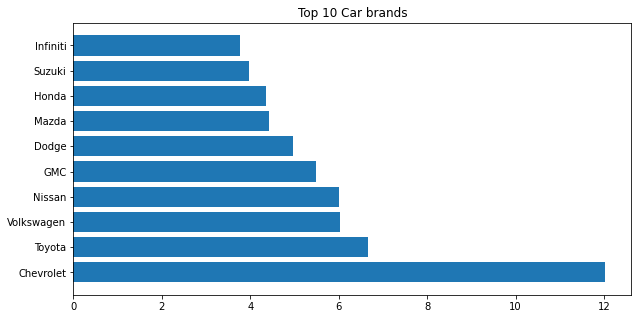

In [26]:

counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())
popular_labels = counts.index[:10]
    
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [27]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


In [28]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


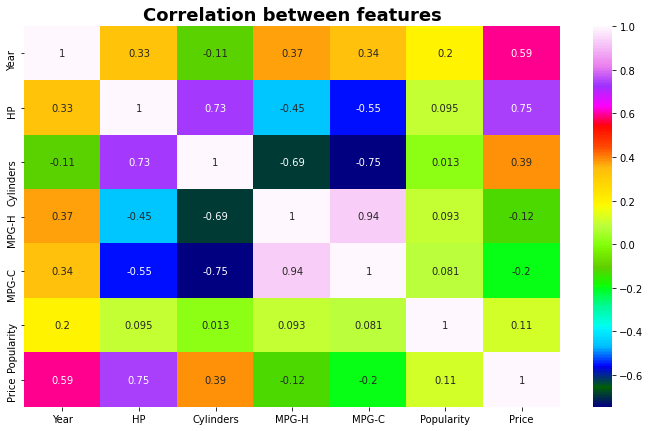

In [29]:
car_corr=df.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(car_corr, cmap='gist_ncar',annot=True)
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.show()

From above heatmap we can conclude 
1)As No. of cylinders increases the horsepower of car increases.
2)The Price of Car is directly  correlated to features, horse power and year.
3)The MPG H and MPG C are inversly corelated with cyilnders.  

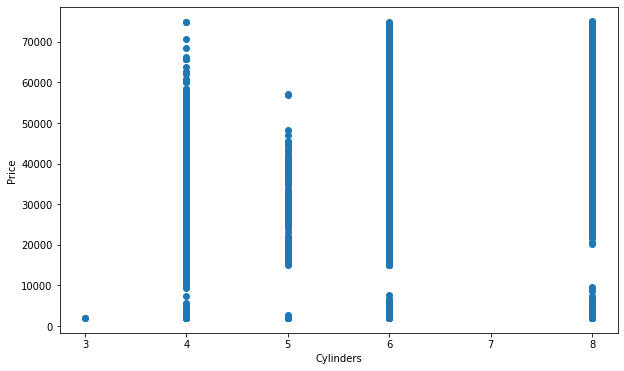

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Cylinders'], df['Price'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('Price')
plt.show()


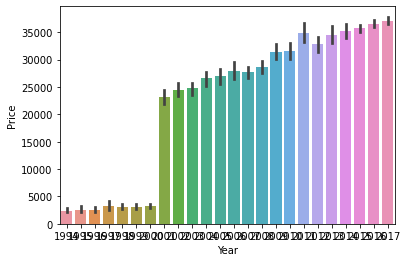

In [31]:
sns.barplot(df['Year'],df['Price'])

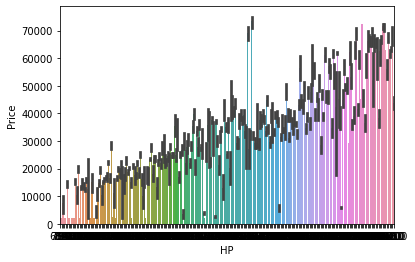

In [32]:
sns.barplot(df['HP'],df['Price'])

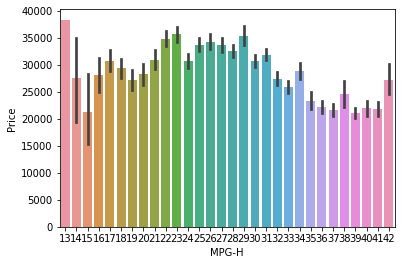

In [33]:
sns.barplot(df['MPG-H'],df['Price'])

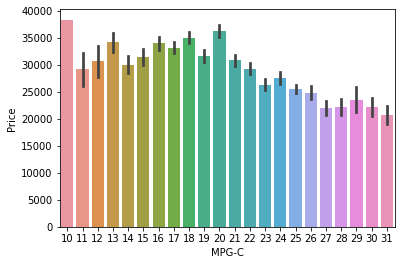

In [34]:
sns.barplot(df['MPG-C'],df['Price'])

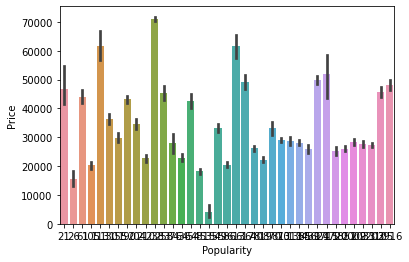

In [35]:
sns.barplot(df['Popularity'],df['Price'])

Hence ,hereby we have checked the effect of various parameters on the price of car.


In [36]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [37]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

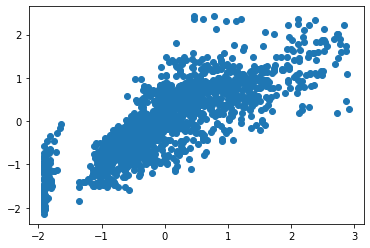

In [40]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

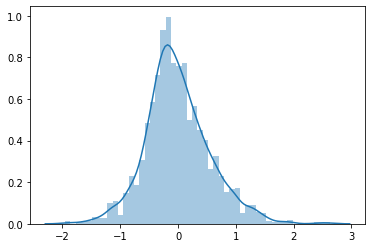

In [41]:
sns.distplot((y_test-y_pred),bins=50)

In [42]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

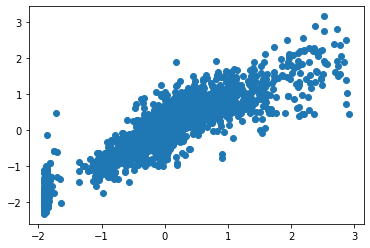

In [44]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

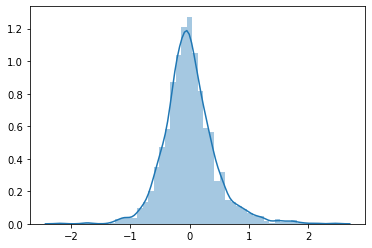

In [45]:
sns.distplot((y_test-y_pred),bins=50)

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694


In [47]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

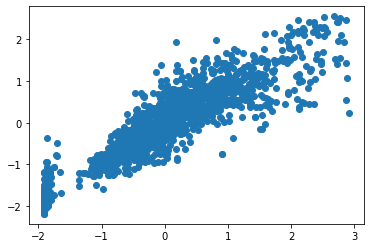

In [48]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

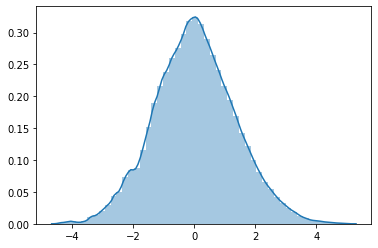

In [49]:
sns.distplot((y_test-y_pred),bins=50)

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


In [51]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

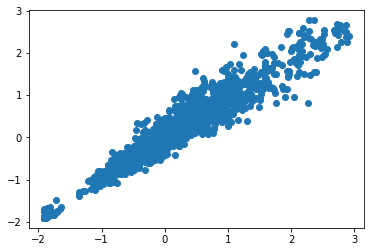

In [52]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

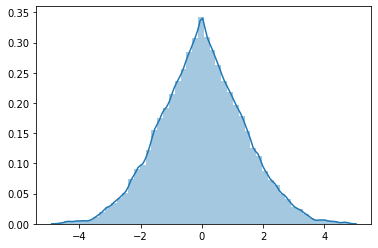

In [53]:
sns.distplot((y_test-y_pred),bins=50)

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332
